# Testing LOSD
### Todesfälle nach Monat, Stadtquartier, Geschlecht, Altersgruppe und Herkunft

Todesfälle nach Monat, Stadtquartier, Geschlecht, Altersgruppe und Herkunft

https://data.integ.stadt-zuerich.ch/dataset/bev421od4210

Datum: 26.03.2024

### Colab
Mit Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden. 

Klicke auf den Button:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/DonGoginho/colab/blob/main/losd/4210_losd_bev_monat_todesfaelle_quartier_geschl_ag_herkunft_od4210.ipynb)


### Importiere die notwendigen Packages

In [2]:
#%pip install altair datetime folium geopandas io requests matplotlib numpy pandas seaborn plotly

In [3]:
import altair as alt
import datetime
import folium 
import geopandas as gpd
import io
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pivottablejs
#from pivottablejs import pivot_ui
import plotly.express as px
import requests
import seaborn as sns

In [4]:
import sys
sys.path.append('../0_scripts')

import my_py_dataviz_functions as mypy_dv
import my_py_dataloading_functions as mypy_dl

In [5]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [6]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Settings
Definiere Settings. 
Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen)

In [7]:
#pd.options.display.float_format = lambda x : '{:,.1f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.1f}'.format(x)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

#### Zeitvariabeln

In [8]:
#Zeitvariabeln als Strings:
now = datetime.date.today()
year_today = now.strftime("%Y")
date_today = "_"+now.strftime("%Y-%m-%d")

#Zeitvariabeln als Integers:
int_times = now.timetuple()
aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2
#print(aktuellesJahr, aktuellerMonat,'datenstand: ', selectedMonat, int_times)

### Daten importieren und Metadaten checken

- status: int / prod
- data_source: web / ld / dropzone
- datums_attr: beschreibt das oder die Datumsfelder, die als Datum geparsed werden sollen. Falls es keines gibt: None

**BITTE HIER ANPASSEN**

In [9]:
package_name = "bev421od4210"

In [10]:
data2betested = mypy_dl.load_data(
    status = 'int'
    , data_source = 'ld'
    , package_name = package_name
    , dataset_name = "bev421od4210.csv"    
    , datums_attr = ['ZEIT_LANG']
    )

fp lautet:https://ld.integ.stadt-zuerich.ch/statistics/view/BEV421OD4210/observation?format=csv


 **Überprüfe die Metadaten:**

 **Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/bev421od4210 

 **View auf INTEG-LD:** Link https://ld.integ.stadt-zuerich.ch/statistics/view/BEV421OD4210 

Es ist ein Fehler aufgetreten: No columns to parse from file


Error: No columns to parse from file



In [11]:
data2betested.head(2)

AttributeError: 'NoneType' object has no attribute 'head'

Berechne weitere Attribute falls notwendig

In [ ]:
data2betested = (
    data2betested
    .copy()
    .assign(
        #Aktualisierungs_Datum_str= lambda x: x.Aktualisierungs_Datum.astype(str),
        StichtagDatJahr = lambda x: x.ZEIT_LANG,
        StichtagDatJahr_str = lambda x: x.ZEIT_LANG.astype(str),
        #Jahr = lambda x: x.ZEIT_LANG.dt.year,
        Jahr_nbr = lambda x: x.ZEIT_CODE.str[-4:].astype(int),    
        RAUM_my_sort = lambda x: x.RAUM_CODE.str[-3:].astype(int),

    )
    .sort_values('ZEIT_LANG', ascending=False)
    )
data2betested

AttributeError: Can only use .str accessor with string values!

Zeitbereich aus den Daten:

In [ ]:
data_max_date = str(max(data2betested.ZEIT_LANG).year)
data_min_date = str(min(data2betested.ZEIT_LANG).year)

print(f"Die Daten haben ein Minimumjahr von {data_min_date} und ein Maximumjahr von {data_max_date}")


Die Daten haben ein Minimumjahr von nan und ein Maximumjahr von nan


Temp speichere die csv-Datei, da es immer wieder zu Ausfällen kommt. So kann ich mal den Report fertig bauen.

In [ ]:
docname = package_name +date_today+".csv"
print(docname)


In [ ]:
data2betested.to_csv('./saved_data/'+docname, index=False)

### Einfache Datentests

In [ ]:
data2betested.head(2).T

,34622,21092
ZEIT_lang,2024-01-31 00:00:00,2024-01-31 00:00:00
ZEIT_code,ZPJAN2024,ZPJAN2024
RAUM_lang,Höngg,Höngg
RAUM_code,R00101,R00101
ALT_lang,20–39 Jahre alt,80–99 Jahre alt
ALT_code,ALT2002,ALT2005
SEX_lang,männlich,männlich
SEX_code,SEX0001,SEX0001
HEL_lang,Schweiz,Ausland
HEL_code,HEL1000,HEL2000


In [ ]:
data2betested.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48118 entries, 34622 to 45259
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ZEIT_lang            48118 non-null  datetime64[ns]
 1   ZEIT_code            48118 non-null  object        
 2   RAUM_lang            48118 non-null  object        
 3   RAUM_code            48118 non-null  object        
 4   ALT_lang             48118 non-null  object        
 5   ALT_code             48118 non-null  object        
 6   SEX_lang             48118 non-null  object        
 7   SEX_code             48118 non-null  object        
 8   HEL_lang             48118 non-null  object        
 9   HEL_code             48118 non-null  object        
 10  ZEK_lang             48118 non-null  object        
 11  ZEK_code             48118 non-null  object        
 12  GES                  48118 non-null  float64       
 13  KreiseZH_lang        48118 

In [ ]:
print(f'The dataset has {data2betested.shape[0]:,.0f} rows (observations) and {data2betested.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {data2betested.duplicated().sum()} exact duplicates in the data.')

The dataset has 48,118 rows (observations) and 19 columns (variables).
There seem to be 0 exact duplicates in the data.


Welches sind die Quartiere ohne Werte bei BEW?

In [ ]:
data2betested[np.isnan(data2betested.GES)]

,ZEIT_lang,ZEIT_code,RAUM_lang,RAUM_code,ALT_lang,ALT_code,SEX_lang,...,GES,KreiseZH_lang,KreiseZH_code,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort


### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [ ]:
data2betested = data2betested.set_index("StichtagDatJahr") 
data2betested = data2betested.sort_index()

In [ ]:
data2betested.index.year.unique()

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
           dtype='int64', name='StichtagDatJahr')

### Beschreibe einzelne Attribute

Beschreibe nicht numerische Attribute

In [ ]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(data2betested.describe(exclude='number',datetime_is_numeric=True))
except:
    print("No categorical data in dataset.")

,ZEIT_lang,ZEIT_code,RAUM_lang,RAUM_code,ALT_lang,ALT_code,SEX_lang,SEX_code,HEL_lang,HEL_code,ZEK_lang,ZEK_code,KreiseZH_lang,KreiseZH_code,StichtagDatJahr_str
count,48118,48118,48118,48118,48118,48118,48118,48118,48118,48118,48118,48118,48118,48118,48118
unique,NaN,9523,12,12,6,6,2,2,2,2,1,1,12,12,9221
top,NaN,ZPJAN2021,Wollishofen,R00021,80–99 Jahre alt,ALT2005,weiblich,SEX0002,Schweiz,HEL1000,Ereignisdatum,ZEKEDAT,Kreis 2 (ab 1893),R00200,2017-01-31
freq,NaN,72,7603,7603,25410,25410,25070,25070,41754,41754,48118,48118,7603,7603,76
mean,2010-07-06 16:31:47.510702848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1998-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2003-10-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2010-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Beschreibe numerische Attribute

In [ ]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.0f}'.format):
        display(data2betested.describe(include='number'))
except:
    print("No numercial data in dataset.")

,GES,Jahr,RAUM_my_sort
count,"48,118","48,118","48,118"
mean,1,"2,010",69
std,1,8,34
min,1,"1,998",11
25%,1,"2,003",31
50%,1,"2,010",71
75%,1,"2,017",101
max,29,"2,024",121


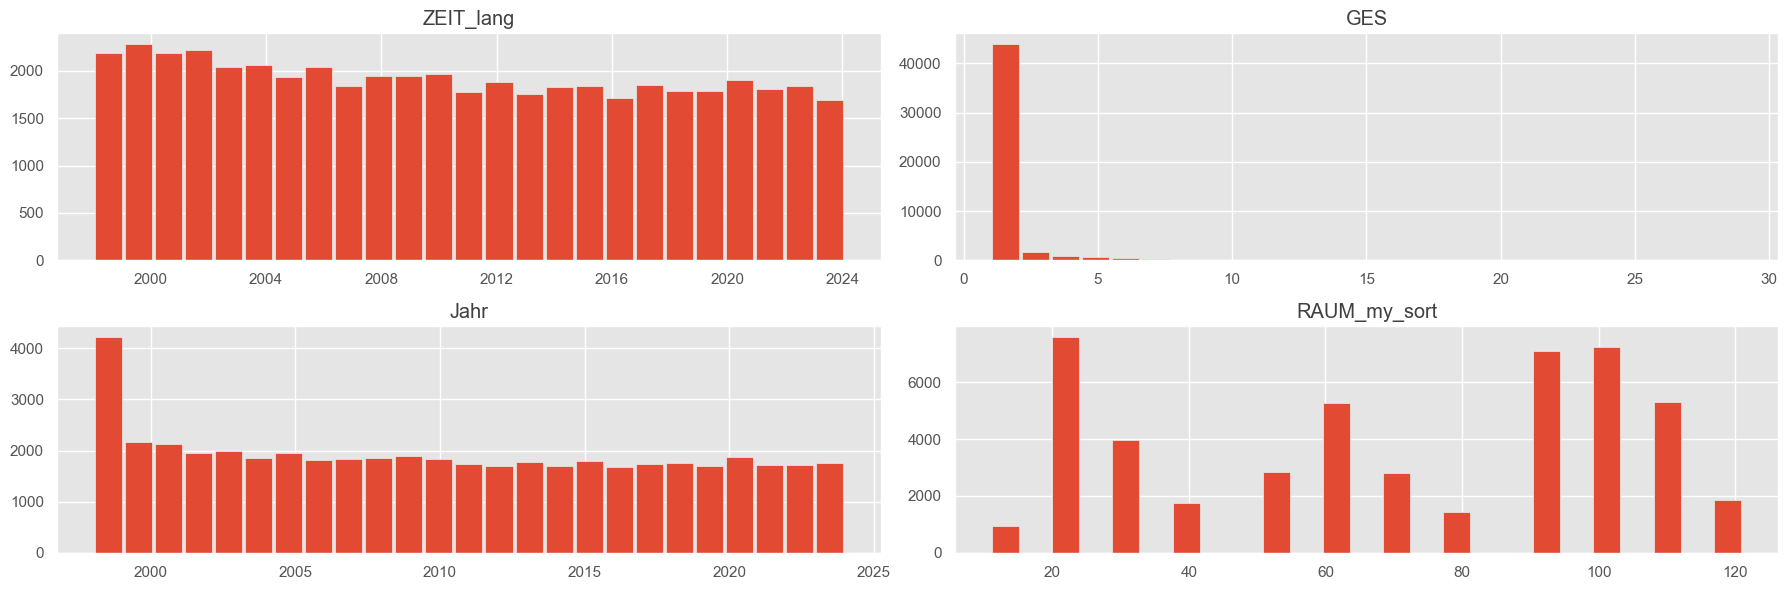

In [ ]:
plt.style.use('ggplot')
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)

try:
    data2betested.hist(bins=25, rwidth=0.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.") 

### Gibt es Duplikate?

In [ ]:
# find duplicate rows
duplicate_rows = data2betested[data2betested.duplicated()]
duplicate_rows

,ZEIT_lang,ZEIT_code,RAUM_lang,RAUM_code,ALT_lang,ALT_code,SEX_lang,...,ZEK_code,GES,KreiseZH_lang,KreiseZH_code,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,,,,


### Nullwerte und Missings?

In [ ]:
data2betested.isnull().sum()

ZEIT_lang              0
ZEIT_code              0
RAUM_lang              0
RAUM_code              0
ALT_lang               0
ALT_code               0
SEX_lang               0
SEX_code               0
HEL_lang               0
HEL_code               0
ZEK_lang               0
ZEK_code               0
GES                    0
KreiseZH_lang          0
KreiseZH_code          0
StichtagDatJahr_str    0
Jahr                   0
RAUM_my_sort           0
dtype: int64

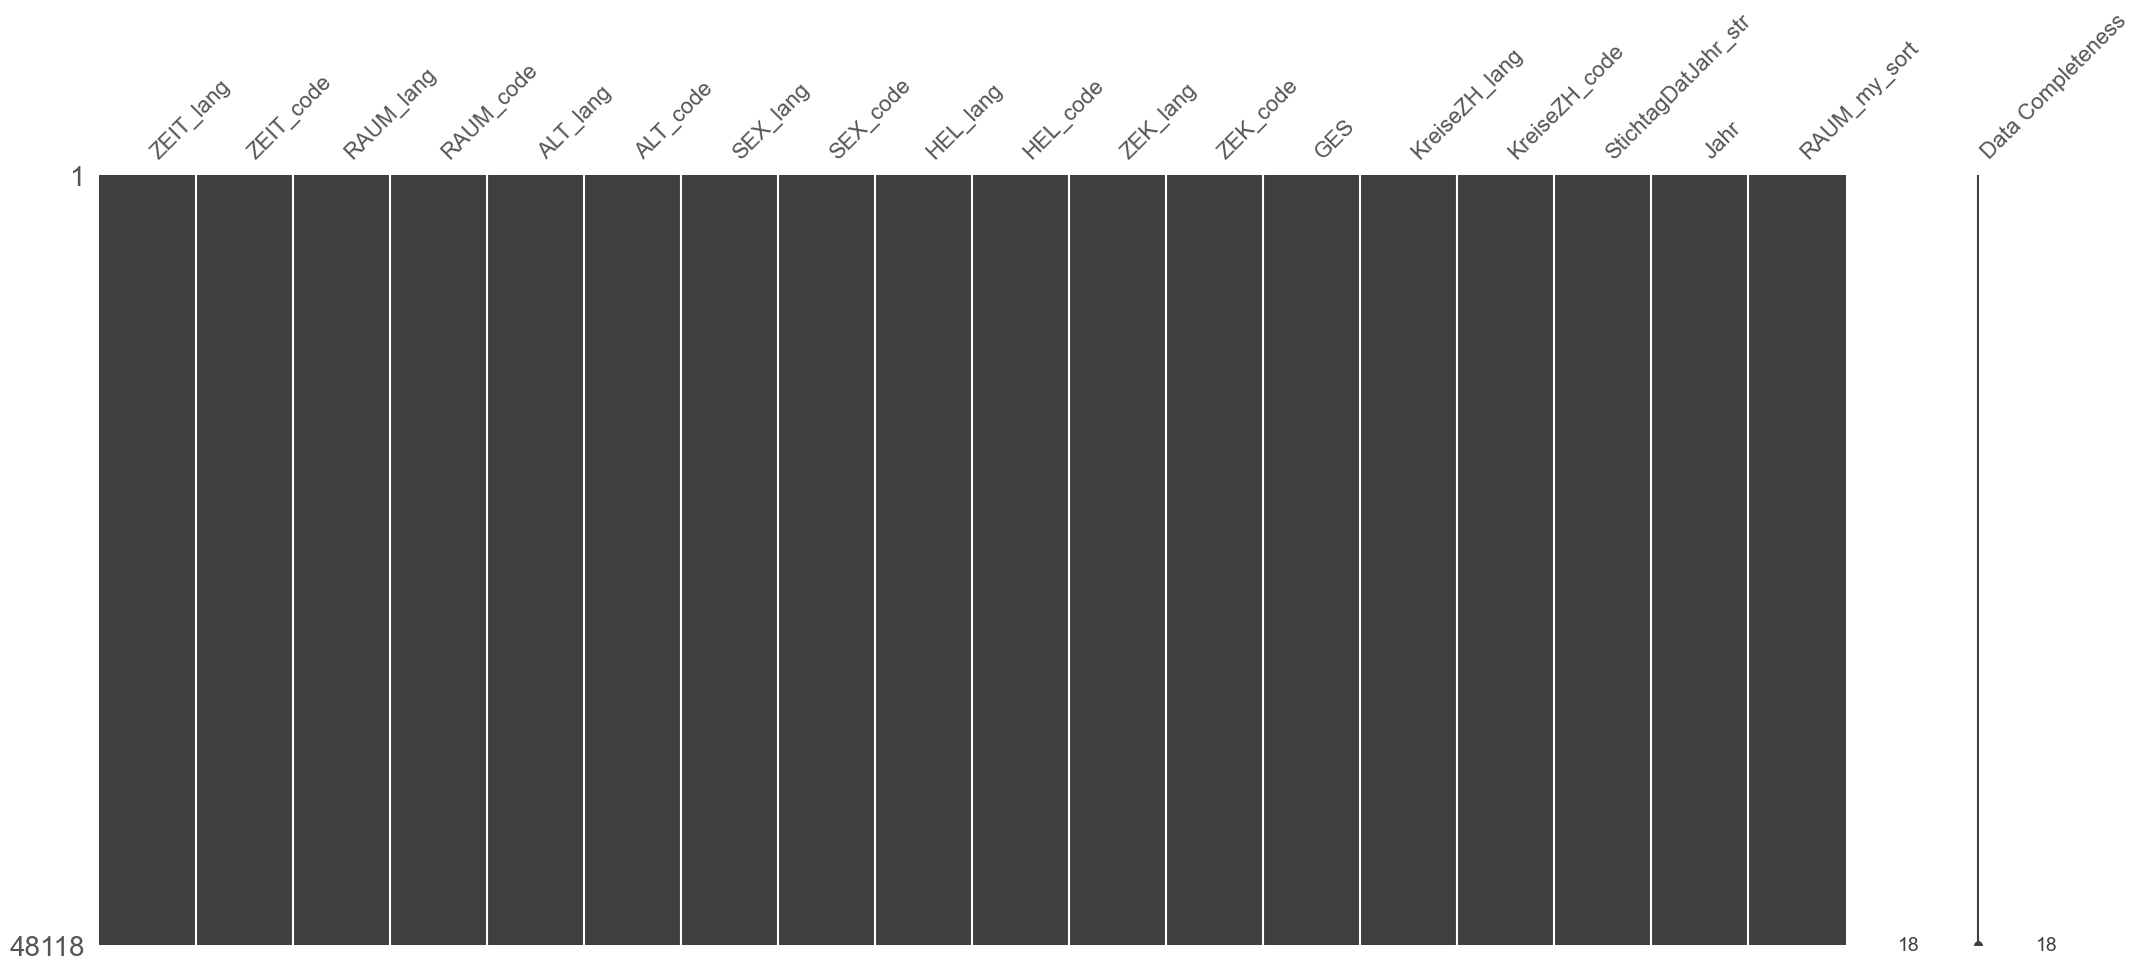

In [ ]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(data2betested, labels=True, sort='descending');
#msno.heatmap(data2betested)

### Gruppierungen

In [ ]:
agg_jahr = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr']) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('Jahr', ascending=False) 
agg_jahr.reset_index().head(3)

,Jahr,sum_AnzBestWir
0,2024,234
1,2023,2235
2,2022,2420


In [ ]:
agg_Quarts = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['RAUM_my_sort', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('RAUM_CODE', ascending=False) 
agg_Quarts.reset_index().head(50)

,RAUM_my_sort,RAUM_lang,RAUM_code,sum_AnzBestWir
0,121,Saatlen,R00121,2098
1,111,Affoltern,R00111,7328
2,101,Höngg,R00101,11400
3,91,Albisrieden,R00091,11082
4,81,Seefeld,R00081,1572
5,71,Fluntern,R00071,3544
6,61,Unterstrass,R00061,7420
7,51,Gewerbeschule,R00051,3354
8,41,Werd,R00041,2034
9,31,Alt-Wiedikon,R00031,5127


In [ ]:
agg_Alt = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['ALT_LANG', 'ALT_CODE',]) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('ALT_CODE', ascending=False) 
agg_Alt.reset_index()

,ALT_lang,ALT_code,sum_AnzBestWir
0,100 Jahre und älter,ALT9100,812
1,80–99 Jahre alt,ALT2005,40656
2,60–79 Jahre alt,ALT2004,20111
3,40–59 Jahre alt,ALT2003,5178
4,20–39 Jahre alt,ALT2002,1330
5,0–19 Jahre alt,ALT2001,462


In [ ]:
agg_Alt = data2betested.loc[data_max_date]\
    .groupby(['SEX_LANG','SEX_CODE',]) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('SEX_CODE', ascending=False) 
agg_Alt.reset_index()

,SEX_lang,SEX_code,sum_AnzBestWir
0,weiblich,SEX0002,132
1,männlich,SEX0001,102


In [ ]:
agg_ZEK = data2betested.loc[data_max_date]\
    .groupby(['ZEK_LANG', 'ZEK_CODE']) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('ZEK_CODE', ascending=False) 
agg_ZEK.reset_index()

,ZEK_lang,ZEK_code,sum_AnzBestWir
0,Ereignisdatum,ZEKEDAT,234


In [ ]:
agg_Hel = data2betested.loc[data_max_date]\
    .groupby(['HEL_LANG', 'HEL_CODE']) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('HEL_CODE', ascending=False) 
agg_Hel.reset_index()

,HEL_lang,HEL_code,sum_AnzBestWir
0,Ausland,HEL2000,32
1,Schweiz,HEL1000,202


In [ ]:
agg_Kreise = data2betested.loc[data_max_date]\
    .groupby(['KreiseZH_LANG', 'KreiseZH_CODE']) \
    .agg(sum_AnzBestWir=('GES', 'sum')) \
    .sort_values('KreiseZH_code', ascending=True) 
agg_Kreise.reset_index()

,KreiseZH_lang,KreiseZH_code,sum_AnzBestWir
0,Kreis 2 (ab 1893),R00200,44
1,Kreis 3 (ab 1915),R00600,18
2,Kreis 4 (ab 1915),R00700,2
3,Kreis 5 (ab 1915),R00800,6
4,Kreis 8 (ab 1915),R01100,6
5,Kreis 6 (ab 1934),R01200,16
6,Kreis 7 (ab 1934),R01300,18
7,Kreis 9 (ab 1934),R01400,36
8,Kreis 10 (ab 1934),R01500,46
9,altes Quartier Schwamendingen (1934-1969); Kre...,R01700,4


In [ ]:
data2betested.columns

Index(['ZEIT_lang', 'ZEIT_code', 'RAUM_lang', 'RAUM_code', 'ALT_lang', 'ALT_code', 'SEX_lang',
       'SEX_code', 'HEL_lang', 'HEL_code', 'ZEK_lang', 'ZEK_code', 'GES', 'KreiseZH_lang',
       'KreiseZH_code', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [ ]:
data2betested.loc[data_max_date].head(4)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

,ZEIT_lang,ZEIT_code,RAUM_lang,RAUM_code,ALT_lang,ALT_code,SEX_lang,...,ZEK_code,GES,KreiseZH_lang,KreiseZH_code,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,,,,
2024-01-01,2024-01-01,Z01012024,Wollishofen,R00021,60–79 Jahre alt,ALT2004,männlich,...,ZEKEDAT,2,Kreis 2 (ab 1893),R00200,2024-01-01,2024,21
2024-01-01,2024-01-01,Z01012024,Höngg,R00101,80–99 Jahre alt,ALT2005,weiblich,...,ZEKEDAT,2,Kreis 10 (ab 1934),R01500,2024-01-01,2024,101
2024-01-01,2024-01-01,Z01012024,Albisrieden,R00091,80–99 Jahre alt,ALT2005,männlich,...,ZEKEDAT,1,Kreis 9 (ab 1934),R01400,2024-01-01,2024,91
2024-01-01,2024-01-01,Z01012024,Wollishofen,R00021,80–99 Jahre alt,ALT2005,weiblich,...,ZEKEDAT,1,Kreis 2 (ab 1893),R00200,2024-01-01,2024,21


### Visualisierungen nach Zeitausschnitten

#### Monatliche Todesfälle seit ...

In [ ]:
data2betested.columns

Index(['ZEIT_lang', 'ZEIT_code', 'RAUM_lang', 'RAUM_code', 'ALT_lang', 'ALT_code', 'SEX_lang',
       'SEX_code', 'HEL_lang', 'HEL_code', 'ZEK_lang', 'ZEK_code', 'GES', 'KreiseZH_lang',
       'KreiseZH_code', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [ ]:
myAggAll.reset_index().head(1)

myAgg1 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr','ZEIT_LANG', 'ZEIT_CODE','StichtagDatJahr_str', 'Jahr']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=False) 

myAgg1.reset_index().tail(6)

,StichtagDatJahr,ZEIT_lang,ZEIT_code,sum_WBev
0,2024-01-31,2024-01-31,ZPJAN2024,117


In [ ]:
grafik1 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg1.reset_index().query('sum_GES>0')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_GES:Q'
    ,y_beschriftung = 'Anz. Todesfälle'
    ,category = ''
    ,category_beschriftung= ''
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Monatliche Tosesfälle, seit "+str(data2betested.index.year.min())
)
grafik1

In [ ]:
grafic_name = package_name+"_alt1_total"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik1.save('grafiken_testing/'+grafic_name)

In [ ]:
# DELETE!
myTitle="DELETE! Monatliche Tosesfälle, seit "+str(data2betested.index.year.min())

highlight = alt.selection(type='single', on='mouseover',
                          fields=['sum_WBev'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myAggAll.reset_index().query('sum_WBev>30'), title=myTitle).encode(
    x=alt.X('StichtagDatJahr', axis=alt.Axis(title='Jahr'))# , axis=alt.Axis(format='%', title='percentage')
    , y=alt.X('sum_WBev', axis=alt.Axis(title='Anz. Personen'))
    #, color=alt.Color('QuarLang', legend=alt.Legend(title="Altersgruppen", orient="right"))  
    ,tooltip=['StichtagDatJahr','sum_WBev']    
)
points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=750 , height=350
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(0.5), alt.value(4))
).interactive()

lines + points

alt.LayerChart(...)

#### Monatliche Todesfälle nach Stadtquartieren seit ...

In [ ]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'RAUM_LANG', 'RAUM_CODE','StichtagDatJahr_str', 'Jahr']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg2.reset_index().head(3)

In [ ]:
grafik2 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg2.reset_index().query('sum_GES>0')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_GES:Q'
    ,y_beschriftung = 'Anz. Todesfälle'
    ,category = 'RAUM_LANG'
    ,category_beschriftung= 'Stadtquartier'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Monatliche Todesfälle nach Stadtquartier, seit "+str(data2betested.index.year.min())
)
grafik2

In [ ]:
grafic_name = package_name+"_alt2_raum_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik2.save('grafiken_testing/'+grafic_name)

In [ ]:
# DELETE!
myTitle="DELETE! Monatliche Todesfälle nach Stadtquartier, seit "+str(data2betested.index.year.min())
highlight = alt.selection(type='single', on='mouseover',
                          fields=['RAUM_lang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myAgg.reset_index().query('sum_WBev>0'), title=myTitle).encode(
    x=alt.X('StichtagDatJahr', axis=alt.Axis(title='Jahr'))# , axis=alt.Axis(format='%', title='percentage')
    , y=alt.X('sum_WBev', axis=alt.Axis(title='Anz. Personen'))
    , color=alt.Color('RAUM_lang', legend=alt.Legend(title="Stadtquartier", orient="right"))  
    ,tooltip=['StichtagDatJahr', 'RAUM_lang','sum_WBev']    
)
points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=750 , height=350
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(0.5), alt.value(4))
).interactive()

lines + points

#### Monatliche Todesfälle nach Altersgruppen 

In [ ]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg3 = data2betested.loc["2018":data_max_date]\
    .groupby(['StichtagDatJahr', 'ALT_LANG', 'ALT_CODE', 'StichtagDatJahr_str', 'Jahr']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg3.reset_index().head(5)


,StichtagDatJahr,ALT_lang,ALT_code,sum_WBev
0,2018-01-01,20–39 Jahre alt,ALT2002,2
1,2018-01-01,40–59 Jahre alt,ALT2003,5
2,2018-01-01,60–79 Jahre alt,ALT2004,12
3,2018-01-01,80–99 Jahre alt,ALT2005,12
4,2018-01-02,60–79 Jahre alt,ALT2004,2


In [ ]:
grafik3 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg3.reset_index().query('sum_GES>0')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_GES:Q'
    ,y_beschriftung = 'Anz. Todesfälle'
    ,category = 'ALT_LANG'
    ,category_beschriftung= 'Altersgruppen'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Monatliche Todesfälle nach Altersgruppen, seit "+str(data2betested.index.year.min())
)
grafik3

In [ ]:
grafic_name = package_name+"_alt3_alter_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik3.save('grafiken_testing/'+grafic_name)

In [ ]:
# DELETE!
myTitle="DELETE! Monatliche Todesfälle nach Altersgruppen, seit "+str(data2betested.index.year.min())

highlight = alt.selection(type='single', on='mouseover',
                          fields=['ALT_lang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myAgg2.reset_index(), title=myTitle).encode(
    x=alt.X('StichtagDatJahr', axis=alt.Axis(title='Jahr'))# , axis=alt.Axis(format='%', title='percentage')
    , y=alt.X('sum_WBev', axis=alt.Axis(title='Anz. Personen'))
    , color=alt.Color('ALT_lang', legend=alt.Legend(title="Altersgruppen", orient="right"))  
    ,tooltip=['StichtagDatJahr', 'ALT_lang','sum_WBev']    
)
points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=750 , height=350
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(0.5), alt.value(4))
).interactive()

lines + points

alt.LayerChart(...)

#### Monatliche Todesfälle nach Geschlecht

In [ ]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg4 = data2betested.loc["2018":data_max_date]\
    .groupby(['StichtagDatJahr', 'SEX_LANG','SEX_CODE','StichtagDatJahr_str', 'Jahr' ]) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg4.reset_index().head(5)


,StichtagDatJahr,SEX_lang,SEX_code,sum_WBev
0,2018-01-01,männlich,SEX0001,17
1,2018-01-01,weiblich,SEX0002,14
2,2018-01-02,männlich,SEX0001,2
3,2018-01-02,weiblich,SEX0002,3
4,2018-01-03,weiblich,SEX0002,2


In [ ]:
grafik4 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg4.reset_index().query('sum_GES>0')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_GES:Q'
    ,y_beschriftung = 'Anz. Todesfälle'
    ,category = 'SEX_LANG'
    ,category_beschriftung= 'Geschlecht'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Monatliche Todesfälle nach Geschlecht, seit "+str(data2betested.index.year.min())
)
grafik4

In [ ]:
grafic_name = package_name+"_alt4_sex_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik4.save('grafiken_testing/'+grafic_name)

In [ ]:
# DELETE!
myTitle="DELETE! Entwicklung Wohnbevölkerung nach Geschlecht, seit "+str(data2betested.index.year.min())

highlight = alt.selection(type='single', on='mouseover',
                          fields=['SEX_lang'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myAgg3.reset_index(), title=myTitle).encode(
    x=alt.X('StichtagDatJahr', axis=alt.Axis(title='Jahr'))# , axis=alt.Axis(format='%', title='percentage')
    , y=alt.X('sum_WBev', axis=alt.Axis(title='Anz. Personen'))
    , color=alt.Color('SEX_lang', legend=alt.Legend(title="Geschlecht", orient="right"))  
    ,tooltip=['StichtagDatJahr', 'SEX_lang','sum_WBev']    
)
points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=750 , height=350
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(0.5), alt.value(4))
).interactive()

lines + points

alt.LayerChart(...)

In [ ]:
data2betested.columns

Index(['ZEIT_lang', 'ZEIT_code', 'RAUM_lang', 'RAUM_code', 'ALT_lang', 'ALT_code', 'SEX_lang',
       'SEX_code', 'HEL_lang', 'HEL_code', 'ZEK_lang', 'ZEK_code', 'GES', 'KreiseZH_lang',
       'KreiseZH_code', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

#### Barcharts mit Seaborn

In [ ]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAggBar = data2betested.loc["2018":data_max_date]\
    .groupby(['StichtagDatJahr','Jahr', 'KreiseZH_LANG','KreiseZH_CODE']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAggBar.reset_index().head(3)

,StichtagDatJahr,Jahr,KreiseZH_lang,KreiseZH_code,sum_WBev
0,2018-01-01,2018,Kreis 1 (Stadtgebiet vor 1893),R10000,2
1,2018-01-01,2018,Kreis 9 (ab 1934),R01400,3
2,2018-01-01,2018,Kreis 8 (ab 1915),R01100,1


In [ ]:
#help(sns.catplot)     

In [ ]:
#Stile for the following sns graphs
sns.set_theme(style="whitegrid")

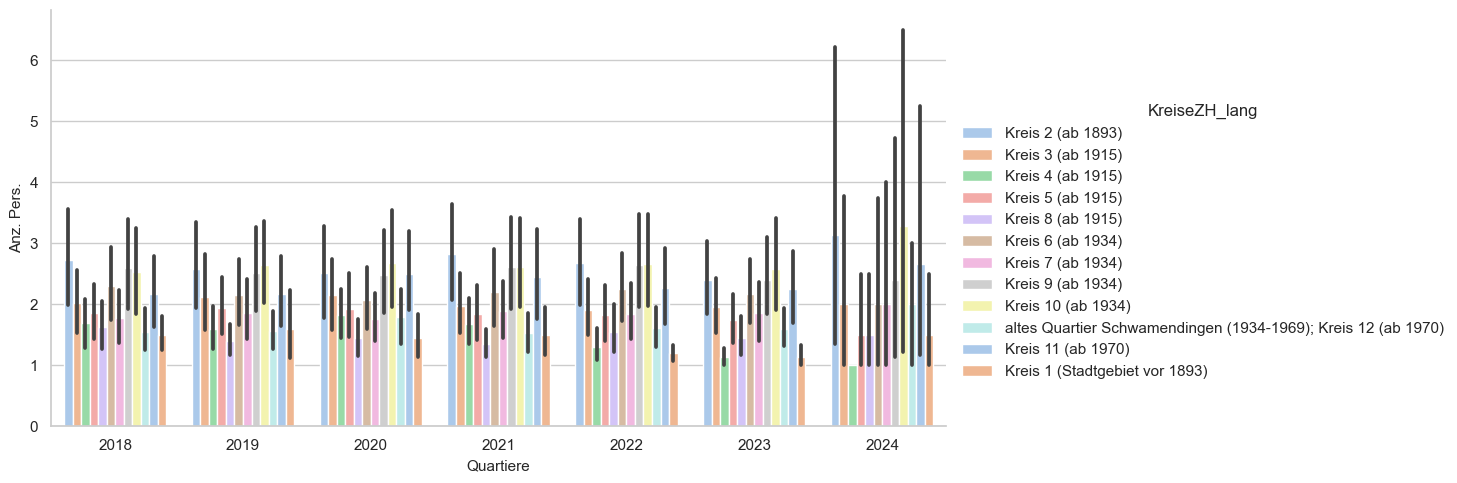

In [ ]:
#sns.color_palette("flare", as_cmap=True)
myHist = sns.catplot(x="Jahr"
            , y="sum_GES"
            , hue="KreiseZH_LANG"
            , kind="bar" #boxen, violin, --> wenn die aggregation nicht genau den werten in der grafik entspricht
            , palette="pastel" #, color="green"
            , height=5
            , aspect=2
            , order=None, legend_out=True
            ,data=myAggBar.reset_index().sort_values("KreiseZH_CODE", ascending=True)
           )
myHist.set_xlabels('Quartiere', fontsize=11) # not set_label
myHist.set_ylabels('Anz. Pers.', fontsize=11)


#### Facet Grids

##### Todesfälle nach Stadtquartier

In [ ]:
myFG = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('RAUM_my_sort', ascending=True) 

myFG

,,,,,sum_WBev
Jahr,StichtagDatJahr_str,RAUM_lang,RAUM_code,RAUM_my_sort,
2013,2013-05-05,Rathaus,R00011,11,1
2019,2019-10-11,Rathaus,R00011,11,1
2008,2008-01-31,Rathaus,R00011,11,1
2019,2019-10-21,Rathaus,R00011,11,1
2008,2008-01-11,Rathaus,R00011,11,1
...,...,...,...,...,...
2002,2002-08-25,Saatlen,R00121,121,1
2022,2022-06-17,Saatlen,R00121,121,1
2019,2019-05-03,Saatlen,R00121,121,1


In [ ]:
faced_grid1 = mypy_dv.plot_sns_facetgrid(
    data = myFG.reset_index()
    ,col = "RAUM_LANG"
    ,hue = "RAUM_LANG"
    ,col_wrap = 6
    ,height = 3
    ,grafiktyp = sns.lineplot
    ,x = "Jahr"
    ,xlabel = ''
    ,y = "sum_GES"
    ,ylabel= "Anzahl Todesfälle"
    ,warning_status ="ignore"
    ,myTitle="Todesfälle nach Quartier, seit "+str(data2betested.index.year.min())
)
faced_grid1

In [ ]:
grafic_name = package_name+"_fg_quartier_zeit_"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid1.savefig('grafiken_testing/'+grafic_name)

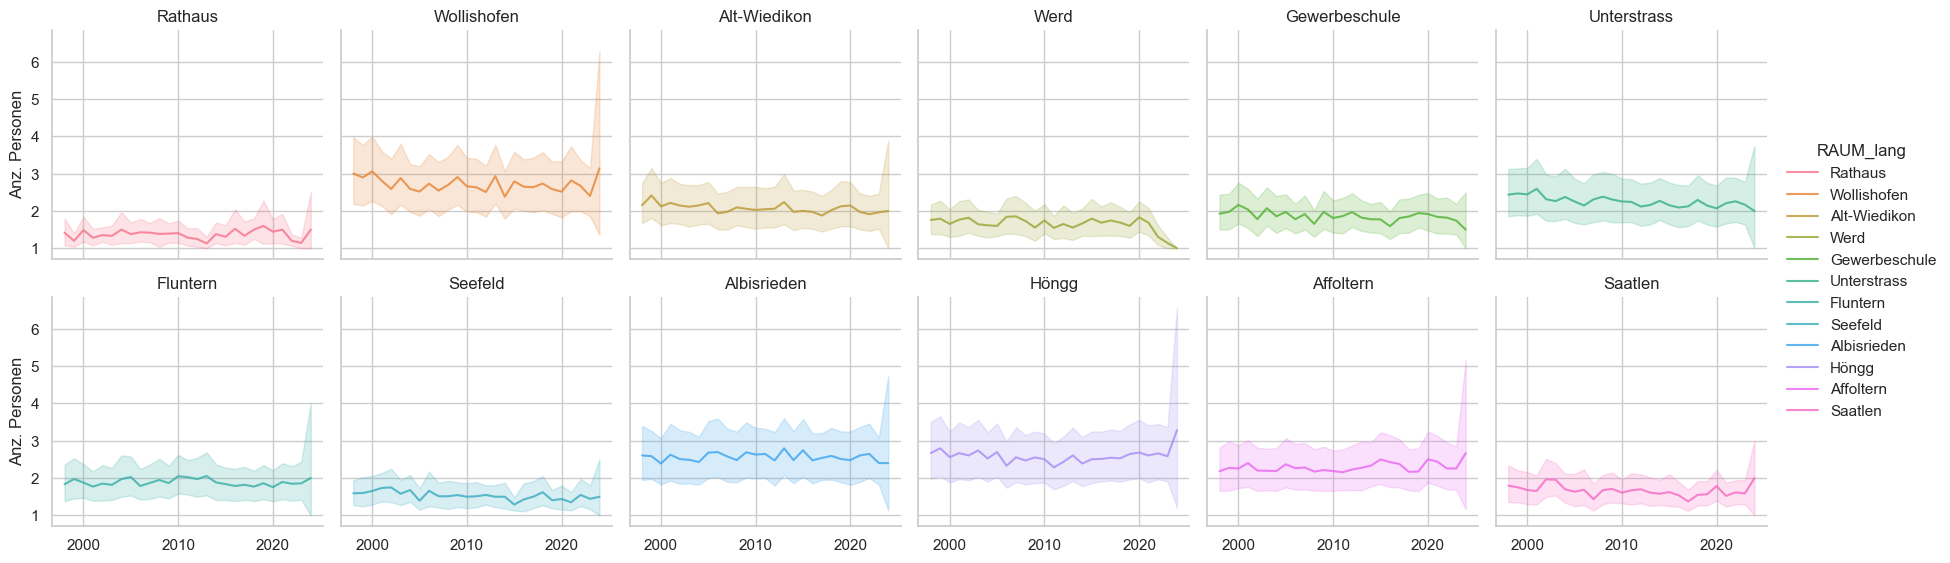

In [ ]:
# DELETE!
g2 = sns.FacetGrid(myFG.reset_index(), col="RAUM_lang", hue="RAUM_lang", col_wrap=6, height=3,)
g2.map(sns.lineplot, "Jahr","sum_WBev",alpha=.8)

g2.set_axis_labels("","Anz. Personen")
g2.set_titles(col_template="{col_name}", row_template="{row_name}")

g2.add_legend()


##### Todesfälle nach Alter und Herkunft



In [ ]:
data2betested.columns

Index(['ZEIT_lang', 'ZEIT_code', 'RAUM_lang', 'RAUM_code', 'ALT_lang', 'ALT_code', 'SEX_lang',
       'SEX_code', 'HEL_lang', 'HEL_code', 'ZEK_lang', 'ZEK_code', 'GES', 'KreiseZH_lang',
       'KreiseZH_code', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [ ]:
myFG2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr', 'ALT_LANG', 'ALT_CODE', 'HEL_LANG', 'HEL_CODE']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('ALT_code', ascending=True) 

myFG2.head(2)

,,,,,,sum_WBev
Jahr,StichtagDatJahr,ALT_lang,ALT_code,HEL_lang,HEL_code,
2000,2000-02-29,0–19 Jahre alt,ALT2001,Schweiz,HEL1000,1
2019,2019-07-31,0–19 Jahre alt,ALT2001,Ausland,HEL2000,2


In [ ]:
faced_grid2 = mypy_dv.plot_sns_facetgrid(
    data = myFG2.reset_index().sort_values('ALT_CODE', ascending=True)
    ,col = "ALT_LANG"
    ,hue = "HEL_LANG"
    ,col_wrap = 3
    ,height = 3
    ,grafiktyp = sns.lineplot
    ,x = "StichtagDatJahr"
    ,xlabel = ''
    ,y = "sum_GES"
    ,ylabel= "Anzahl Todesfälle"
    ,warning_status ="ignore"
    ,myTitle="Todesfälle nach Herkunft und Alter, seit "+str(data2betested.index.year.min())
)
faced_grid2

In [ ]:
grafic_name = package_name+"_fg_alter_herkunft_zeit_"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid2.savefig('grafiken_testing/'+grafic_name)

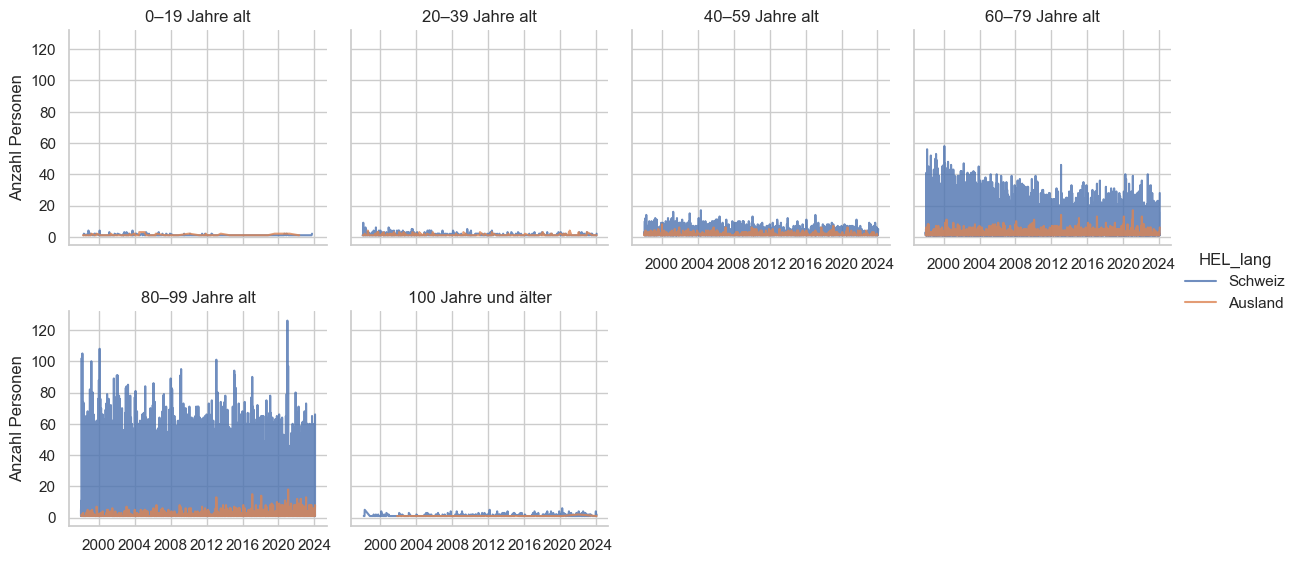

In [ ]:
#To Delete!
g3 = sns.FacetGrid(myFG2.reset_index().sort_values('ALT_CODE', ascending=True), col="ALT_LANG", hue="HEL_LANG", col_wrap=4, height=3,)
g3.map(sns.lineplot, "StichtagDatJahr","sum_WBev",alpha=.8)

g3.set_axis_labels("","Anzahl Personen")
g3.set_titles(col_template="{col_name}", row_template="{row_name}")
g3.add_legend()

### Daten in interaktiver Treemap zeigen

In [ ]:
data2betested.columns

Index(['ZEIT_lang', 'ZEIT_code', 'RAUM_lang', 'RAUM_code', 'ALT_lang', 'ALT_code', 'SEX_lang',
       'SEX_code', 'HEL_lang', 'HEL_code', 'ZEK_lang', 'ZEK_code', 'GES', 'KreiseZH_lang',
       'KreiseZH_code', 'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [ ]:
myTM = data2betested.loc[data_max_date]  \
    .groupby(['StichtagDatJahr', 'SEX_LANG','SEX_CODE', 'ALT_LANG', 'ALT_CODE', 'HEL_LANG', 'HEL_CODE', 'KREISEZH_LANG','KREISEZH_CODE']) \
    .agg(sum_GES=('GES', 'sum')) \
    .sort_values('sum_GES', ascending=True) 

In [ ]:
treeMap1 = mypy_dv.plot_px_treemap(
    data=myTM.reset_index()
    ,levels=["KREISEZH_LANG", "ALT_LANG", "SEX_LANG"]
    ,values="sum_GES"
    ,color="ALT_LANG"
    ,color_discrete_map={'(?)':'lightgrey', 'Wohnen':'lightblue'}   
    ,myHeaderTitle="Todesfälle nach Alter, Geschlecht, Herkunft und Stadtkreis, "+data_max_date             
    #,margin_val_bottom=25
)
treeMap1

In [ ]:
grafic_name = package_name+"_tm_kreis_alt_sex"+date_today+".png"
print(grafic_name)

treeMap1.write_image('grafiken_testing/'+grafic_name)

In [ ]:
#DELETE
my_Title = "Todesfälle nach Alter, Geschlecht, Herkunft und Stadtkreis"

fig = px.treemap(myTreemapAgg.reset_index(), path=[px.Constant(my_Title),'KreiseZH_lang', 'ALT_lang', 'SEX_lang']
                 , values='sum_WBev'
                 , color='ALT_lang'
                 ## bei discrete scales (bei Klassen und Strings):                 
                 #, color_discrete_map={'(?)':'lightgrey','EVP':'gold', 'Ausländer/in':'#FF3030', 'PdA':'#EE3B3B', 'Grüne':'#A2CD5A','GLP':'#CAFF70','Die Mitte':'orange','FDP':'#104E8B','AL':'deeppink','SVP':'forestgreen', 'FL ZÜRI':'#8B864E','Volt':'#lightblue' }         
                 , color_discrete_map={'(?)':'lightgrey','Schweizer/in':'gold', 'SP':'#FF3030' }               
                 ## bei continuous scales (bei Zahlenwerten):
                , color_continuous_scale='blues'
                #, color_continuous_midpoint=np.average(df['AnzBestWir'], weights=df['AnzBestWir'])   
                 ,height=600
                 ,width=1100
                )
fig.update_traces(root_color="grey")
fig.update_layout(margin = dict(t=50, l=25, r=250, b=25))
fig.data[0].hovertemplate = '%{label}<br><br>AnzPers:<br>%{value}<extra></extra>'
fig.show()

## ---------------------- hier Plausi beendet

Übersicht zu LOSD-Jobs:
[Sharepoint](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/OGD%20Metadaten.aspx#InplviewHasheb69a2c0-ed94-4ef2-91a5-3b19f038e442=FilterField1%3DMetadaten%255Fx002d%255FPublikations%255Fx00-FilterValue1%3DINT)